In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

SEEDS = [5,26,47,76,92]

ENVIRONMENT_NAME = "MOHalfCheetahDR-v5" # CHANGE THIS TO THE NAME OF THE ENVIRONMENT
METRIC = "normalized_hypervolume" # CHANGE THIS TO THE DESIRED METRIC

In [13]:
ALGORITHMS = ['MORL-D(MOSAC)-SB+PSA', 'MORL-D(MOSAC)-SB', 'GPI-PD Continuous Action', 'GPI-LS Continuous Action', 'PGMORL', 'CAPQL', 'PCN continuous action', 'SAC Continuous Action']
ENVIRONMENTS = {
    "MOHopperDR-v5": ["MOHopperDefault-v5","MOHopperLight-v5","MOHopperHeavy-v5","MOHopperSlippery-v5","MOHopperLowDamping-v5","MOHopperHard-v5"],
    "MOHalfCheetahDR-v5": ["MOHalfCheetahDefault-v5","MOHalfCheetahLight-v5","MOHalfCheetahHeavy-v5","MOHalfCheetahSlippery-v5","MOHalfCheetahHard-v5"],
    "MOHumanoidDR-v5": ["MOHumanoidDefault-v5","MOHumanoidLight-v5","MOHumanoidHeavy-v5","MOHumanoidLowDamping-v5","MOHumanoidHard-v5"],
    "MOLunarLanderDR-v0": ["MOLunarLanderDefault-v0","MOLunarLanderHighGravity-v0","MOLunarLanderWindy-v0","MOLunarLanderTurbulent-v0","MOLunarLanderHard-v0"],
}
ALGORITHMS_NAME_MAP = {
    'PCN continuous action': 'PCN',
    'PGMORL': 'PGMORL',
    'CAPQL': 'CAPQL',
    'GPI-LS Continuous Action': 'GPI-LS',
    'GPI-PD Continuous Action': 'GPI-PD',
    'MORL-D(MOSAC)-SB': 'MORL-D(SB)',
    'MORL-D(MOSAC)-SB+PSA': 'MORL-D(SB+PSA)',
    'SAC Continuous Action': 'SAC'
}

colors = sns.color_palette('colorblind')
ALGORITHMS_COLOR_MAP = {
    'CAPQL': colors[1],
    'GPI-LS': colors[3],
    'GPI-PD': colors[4],
    'MORL-D(SB)': colors[5],
    'MORL-D(SB+PSA)': colors[0],
    'PGMORL': colors[2],
    'PCN': colors[8],
    'SAC': colors[7]
}

In [14]:
def load_scores(env_id, algorithms, seeds, metric):
    envs = ENVIRONMENTS[env_id]
    scores = {}
    for algorithm in algorithms:
        algorithm_name = ALGORITHMS_NAME_MAP[algorithm]
        scores[algorithm_name] = {}
        for env in envs:
            for seed in seeds:
                df = pd.read_csv(f"data/scores/{env_id}/{algorithm}/seed_{seed}.csv")
                metric_values = df[metric + f"/{env}"].values
                scores[algorithm_name].setdefault(env, []).extend(metric_values)
    return scores

def convert_to_matrix(score_dict):
    keys = sorted(list(score_dict.keys()))
    return np.stack([score_dict[k] for k in keys], axis=1)

In [15]:
scores_dict = load_scores(ENVIRONMENT_NAME, ALGORITHMS, SEEDS, METRIC)
for algo in scores_dict.keys():
    scores_dict[algo] = convert_to_matrix(scores_dict[algo])
scores_dict

{'MORL-D(SB+PSA)': array([[0.17322038, 0.08192142, 0.32648859, 0.11722287, 0.15601209],
        [0.19266362, 0.04552866, 0.24429717, 0.11732028, 0.1679392 ],
        [0.19451854, 0.03276423, 0.24426068, 0.09291637, 0.14632244],
        [0.16347721, 0.07056934, 0.2462264 , 0.10640186, 0.14598346],
        [0.11954494, 0.07452748, 0.20887502, 0.07160053, 0.15237406]]),
 'MORL-D(SB)': array([[0.18519046, 0.01114842, 0.20578971, 0.06825362, 0.13921452],
        [0.17687436, 0.01890741, 0.27192237, 0.0546355 , 0.12979013],
        [0.15621594, 0.02420213, 0.15404293, 0.05952381, 0.10850993],
        [0.14974946, 0.0144308 , 0.11061465, 0.07392942, 0.11175764],
        [0.19779804, 0.01750267, 0.30672455, 0.11315993, 0.15016288]]),
 'GPI-PD': array([[0.25918091, 0.02751628, 0.37199267, 0.16920929, 0.19857431],
        [0.2043014 , 0.01921575, 0.2418994 , 0.10296573, 0.14503853],
        [0.22434956, 0.12644916, 0.34639412, 0.16291273, 0.19812423],
        [0.28569044, 0.03746486, 0.28531169,

Best algorithm: GPI-PD


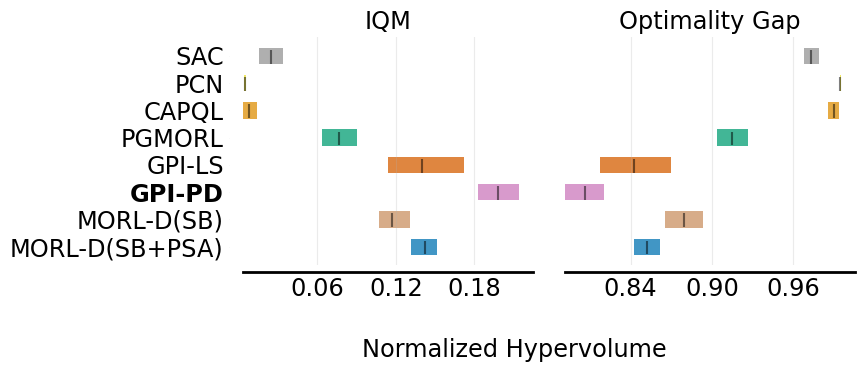

Aggregate scores: {'MORL-D(SB+PSA)': array([0.14241529, 0.85228093]), 'MORL-D(SB)': array([0.11730191, 0.87959795]), 'GPI-PD': array([0.19816979, 0.80603358]), 'GPI-LS': array([0.13962173, 0.8425922 ]), 'PGMORL': array([0.0762045 , 0.91447698]), 'CAPQL': array([0.00760862, 0.98984535]), 'PCN': array([0.00446016, 0.99464369]), 'SAC': array([0.0245504 , 0.97320088])}
Aggregate interval estimates: {'MORL-D(SB+PSA)': array([[0.13142596, 0.84254139],
       [0.15154173, 0.86148832]]), 'MORL-D(SB)': array([[0.1068496 , 0.86571279],
       [0.13064792, 0.89336685]]), 'GPI-PD': array([[0.18278904, 0.79127984],
       [0.21409576, 0.8206377 ]]), 'GPI-LS': array([[0.11376364, 0.8171931 ],
       [0.17246774, 0.86991326]]), 'PGMORL': array([[0.06339069, 0.90368305],
       [0.09043409, 0.92644911]]), 'CAPQL': array([[0.00273041, 0.98554799],
       [0.01354249, 0.99380116]]), 'PCN': array([[0.00404016, 0.99424356],
       [0.00510786, 0.99505948]]), 'SAC': array([[0.0150862 , 0.9678818 ],
       

In [16]:
from rliable import library as rly
from rliable import metrics
from helpers.rliable import plot_interval_estimates

IQM = lambda x: metrics.aggregate_iqm(x)                    # Interquartile Mean
OG = lambda x: metrics.aggregate_optimality_gap(x, 1.0)     # Optimality Gap

aggregate_func = lambda x: np.array([IQM(x), OG(x)])
aggregate_scores, aggregate_interval_estimates = rly.get_interval_estimates(
    scores_dict, aggregate_func, reps=50000)

fig, axes = plot_interval_estimates(
    aggregate_scores, 
    aggregate_interval_estimates,
    metric_names = ['IQM', 'Optimality Gap'],
    algorithms=list(scores_dict.keys()),
    colors=ALGORITHMS_COLOR_MAP,
    xlabel_y_coordinate=-0.2,
    bold_best=True, # Bold the best algorithm
    # subfigure_width=3.6,
    # max_ticks=3,
    xlabel='Normalized Hypervolume')

plt.savefig(f'images/{ENVIRONMENT_NAME}_IQM_OG.png', format='png', bbox_inches='tight')
plt.show()

print("Aggregate scores:", aggregate_scores)
print("Aggregate interval estimates:", aggregate_interval_estimates)

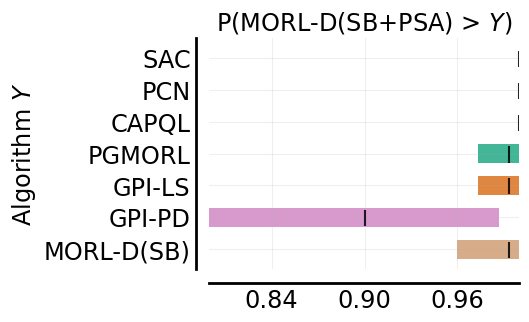

In [15]:
from matplotlib.ticker import MaxNLocator
from rliable import plot_utils

all_pairs = {}
best_algo = 'MORL-D(SB+PSA)'
for alg_y in (scores_dict.keys()):
  if alg_y == best_algo:
    continue
  pair_name = f'{best_algo},{alg_y}'
  all_pairs[pair_name] = (scores_dict[best_algo], scores_dict[alg_y]) 

probabilities, probability_cis = {}, {}
probabilities, probability_cis = rly.get_interval_estimates(all_pairs, metrics.probability_of_improvement, reps=2000)

fig, ax = plt.subplots(figsize=(4, 3))
h = 0.6
algorithm_labels = []

for i, (alg_pair, prob) in enumerate(probabilities.items()):
  _, alg1 = alg_pair.split(',')
  algorithm_labels.append(alg1)
  (l, u) = probability_cis[alg_pair]
  ax.barh(y=i, width=u-l, height=h, left=l, color=ALGORITHMS_COLOR_MAP[alg1], alpha=0.75)
  ax.vlines(x=prob, ymin=i-7.5 * h/16, ymax=i+(6*h/16), color='k', alpha=0.85)
ax.set_yticks(range(len(algorithm_labels)))
ax.set_yticklabels(algorithm_labels)


ax.set_title(fr'P({best_algo} > $Y$)', size='xx-large')
plot_utils._annotate_and_decorate_axis(ax, labelsize='xx-large', ticklabelsize='xx-large')
ax.set_ylabel(r'Algorithm $Y$', size='xx-large')
ax.xaxis.set_major_locator(MaxNLocator(4))
fig.subplots_adjust(wspace=0.25, hspace=0.45)

plt.savefig(f'images/{ENVIRONMENT_NAME}_PROB_IMPROVEMENT.png', format='png', bbox_inches='tight')
plt.show()